In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv(r'clinical_dataset_corrected.csv')
print("Number of fields in the df1:", df1.shape[1])

Number of fields in the df1: 55



# **Classification**


In [6]:
from sklearn.model_selection import train_test_split

# Exclude the fields used for generating the fried categorization
excluded_fields = ['part_id', 'fried', 'weight_loss', 'exhaustion_score', 'gait_speed_slower'
                   , 'grip_strength_abnormal', 'low_physical_activity']
features = [col for col in df1.columns if col not in excluded_fields]

# Split the dataset into features (X) and target (y)
X = df1[features]
y = df1['fried']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## **Random Forest Classifier**


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6481481481481481


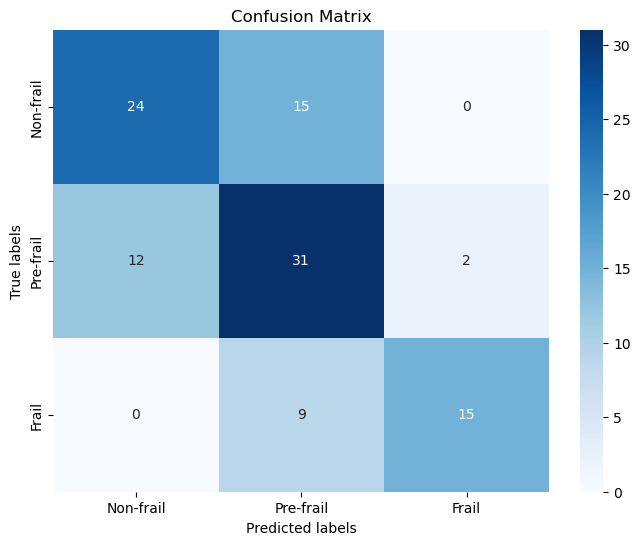

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_true contains the true labels and y_pred contains the predicted labels
class_names = ['Non-frail', 'Pre-frail', 'Frail']   # Frail / Pre-frail / Non-frail --> 2 / 1 / 0   

# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


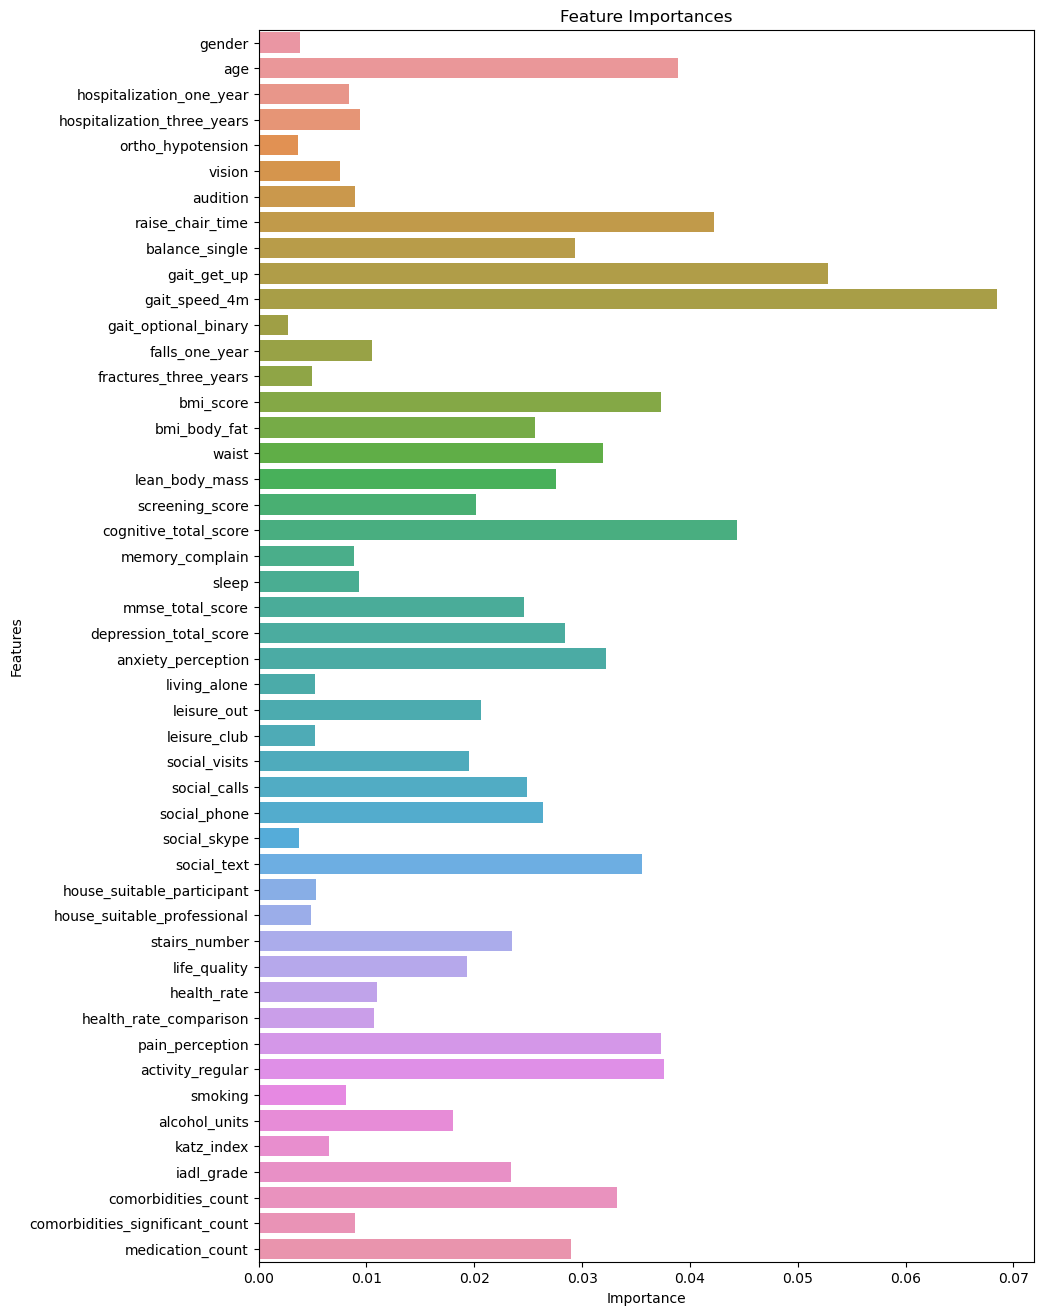

In [9]:

# Plot the feature importances
importances = rf_classifier.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 16))
sns.barplot(x=importances, y=feature_names)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

## **Gradient Boosting Classifier**


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy after Hyperparameter Tuning: {accuracy}')




# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=gb_model.classes_, yticklabels=gb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()